<a href="https://colab.research.google.com/github/SankithaDevatha/Python/blob/main/LogisticRegDecisionTreeRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer




In [7]:
#loading data
cancer = load_breast_cancer()
#print(cancer)
data = cancer.data
columns = cancer.feature_names
df = pd.DataFrame(data, columns=columns)
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(df, cancer.target, test_size=0.2, random_state=42)


In [15]:
#logistic Regression

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logmodel.predict(x_test)
accuracy_log = logmodel.score(x_test, y_test)
print(accuracy_log)

0.9649122807017544


In [21]:
#Decicion tree

from sklearn.tree import DecisionTreeClassifier

decimodel = DecisionTreeClassifier()

decimodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
decimodel.predict(x_test)
deci_acuracy = decimodel.score(x_test,y_test)
print(deci_acuracy)

0.9385964912280702


In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier()

random_model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
random_model.predict(x_test)
random_accuracy = random_model.score(x_test,y_test)
print(random_accuracy)

0.9649122807017544


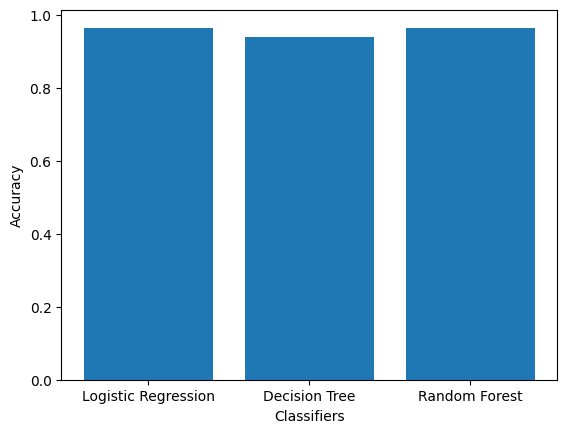

In [27]:
#Barplot for accuracy
import numpy as np
import matplotlib.pyplot as plt

x = ['Logistic Regression','Decision Tree','Random Forest']
y = [accuracy_log ,deci_acuracy ,random_accuracy]

plt.bar(x,y)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()

[[39  4]
 [ 1 70]]


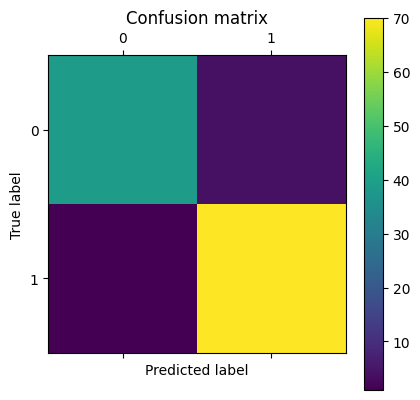

In [31]:
#Confusion matrix
from sklearn import svm
from sklearn.metrics import confusion_matrix

classifier = svm.SVC(kernel='linear')
y_pred = classifier.fit(x_train, y_train).predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()